In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets
import numpy as np

In [2]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.20)

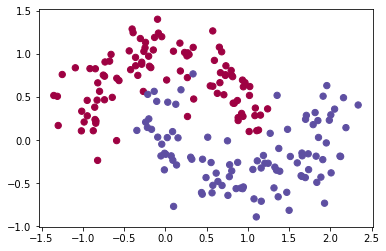

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# Converting the data into tensors
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(1)

In [5]:
# Defining the model
class Model(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super().__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
    def forward(self, X):
        output = self.hidden(X)
        output = F.relu(output)
        output = self.out(output)
        return output

In [6]:
# Building the model
model = Model(input_neurons=2, hidden_neurons=50, output_neurons=1)
# loss function
loss_fn = nn.BCEWithLogitsLoss(reduction='mean')
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

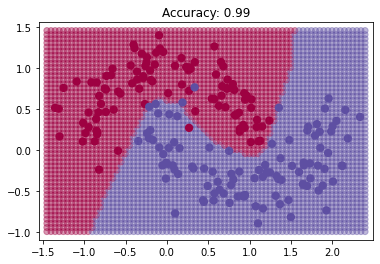

In [7]:
from IPython import display
import time

epochs = 10000


def update_plot(xx, yy, boundary_output, accuracy, epoch):
    %matplotlib inline
    plt.xlim([xx.min()-0.1, xx.max()+0.1])
    plt.ylim([yy.min()-0.1, yy.max()+0.1])
    plt.scatter(xx, yy, c=boundary_output, cmap=plt.cm.Spectral, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=40, lw=2)
    plt.title(f'Accuracy: {accuracy:.2f}')
    if(epoch+1 != epochs):
        display.display(plt.gcf())
        plt.cla()
        display.clear_output(wait=True)

# Training the model
for epoch in range(epochs):
    output =  model(X)
    # calculation of loss
    loss = loss_fn(output, y)
    # calculation of gradients
    optimizer.zero_grad()
    loss.backward()
    # forward prop
    optimizer.step()
    
    
    if (epoch+1)%1000 == 0:
        # Visualizing
        output = (output > 0.5).float()
        accuracy = (output == y.float()).float().mean()
        output = output.numpy()
        # Drawing the boundary
        x_0 = np.arange(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 0.05)
        x_1 = np.arange(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 0.05)
        xx, yy = np.meshgrid(x_0, x_1)
        xx = xx.flatten()
        yy = yy.flatten()
        boundary_input = torch.concat((torch.tensor(xx).unsqueeze(1), torch.tensor(yy).unsqueeze(1)), dim=1).float()
        boundary_output = (model(boundary_input)>.5).float().numpy()
        update_plot(xx, yy, boundary_output, accuracy, epoch)